# Plot PUFFS for PJS

In [1]:
from erddapy import ERDDAP
import pandas as pd
import datetime
import numpy as np


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [90]:
server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)
dfname = pd.read_csv(e.get_search_url(response='csv', search_for=f'pop ckc sst_data'))

gpdf_all = {}
for dataset in sorted(dfname['Dataset ID'].values):
    print(dataset)

    d = ERDDAP(server=server_url,
               protocol='tabledap',
               response='csv',
              )

    d.dataset_id=dataset

    gpdf = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    )

    gpdf.sort_index(inplace=True)
    gpdf.columns = [x[1].split()[0] for x in enumerate(gpdf.columns)]


    gpdf_all.update({dataset:gpdf})

2019_PopUP_300434063823800_sst_data
2019_PopUP_300434063921240_sst_data
2019_PopUP_300434063928220_sst_data
2021_PopUP_300434063479200_sst_data
2021_PopUP_300434063924230_sst_data


In [91]:
pjdf = gpdf_all['2019_PopUP_300434063921240_sst_data']


2019_PopUP_300434063823800_sst_data
2019_PopUP_300434063921240_sst_data
2019_PopUP_300434063928220_sst_data
2021_PopUP_300434063479200_sst_data
2021_PopUP_300434063924230_sst_data


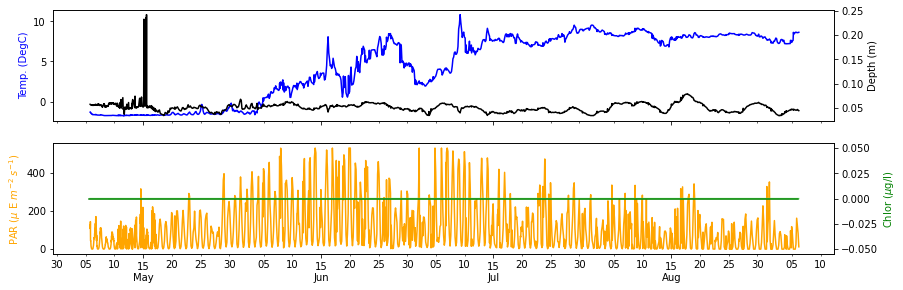

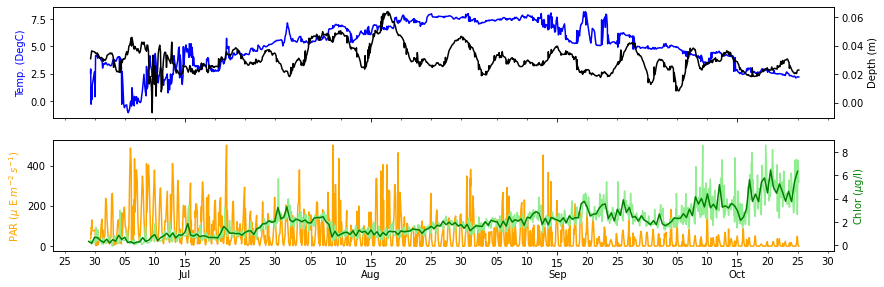

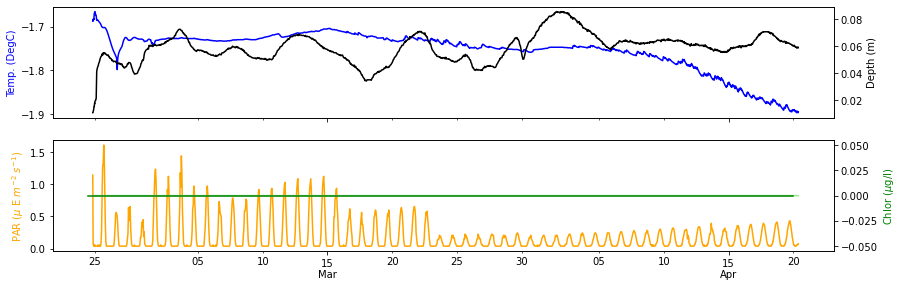

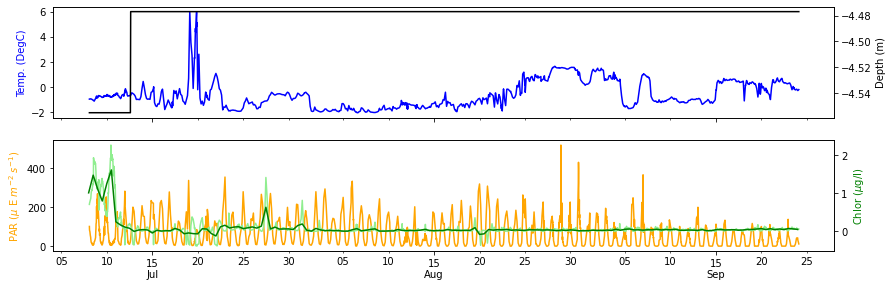

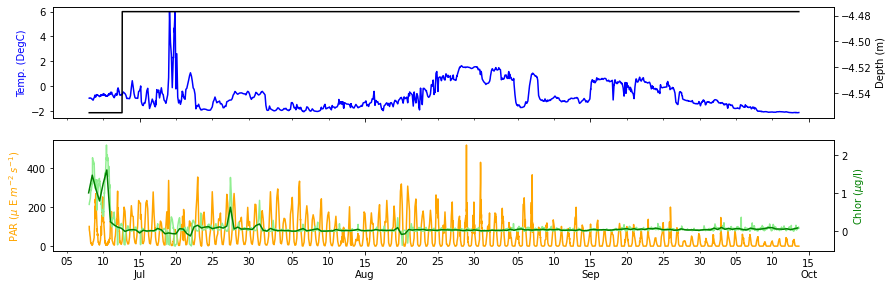

In [92]:
for i,pjdf in gpdf_all.items():
    
    pjdf_hr =pjdf.resample('12h').mean()
    fig, ax = plt.subplots(2,sharex=True,figsize=(14,4.5))
    print(i)

    try:
        ax[0].plot(pjdf.index,pjdf.underside_temp,c='b')
        ax[0].set_ylabel('Temp. (DegC)',c='b')
        axes=ax[0].twinx()
        axes.plot(pjdf.index,pjdf.pressure,c='k')
        axes.set_ylabel('Depth (m)')

        ax[1].plot(pjdf.index,pjdf.par,c='orange')
        ax[1].set_ylabel(r'PAR ($\mu$ E $m^{-2}$ $s^{-1}$)',c='orange')
        axes=ax[1].twinx()
        axes.plot(pjdf.index,pjdf.fluor,c='lightgreen')
        axes.plot(pjdf_hr.index,pjdf_hr.fluor,c='green')
        axes.set_ylabel(r'Chlor ($\mu$g/l)',c='green')

        xfmt = mdates.DateFormatter('%d\n%b')

        ax[0].xaxis.set_major_locator(MonthLocator(bymonthday=15))
        ax[0].xaxis.set_minor_locator(DayLocator(bymonthday=[5,10,15,20,25,30]))
        ax[0].xaxis.set_major_formatter(xfmt)
        ax[0].xaxis.set_minor_formatter(DateFormatter('%d'))
    except:
        ax[0].plot(pjdf.index,pjdf.sr_temp,c='b')
        ax[0].set_ylabel('Temp. (DegC)',c='b')
        axes=ax[0].twinx()
        axes.plot(pjdf.index,pjdf.pressure,c='k')
        axes.set_ylabel('Depth (m)')

        ax[1].plot(pjdf.index,pjdf.par,c='orange')
        ax[1].set_ylabel(r'PAR ($\mu$ E $m^{-2}$ $s^{-1}$)',c='orange')
        axes=ax[1].twinx()
        axes.plot(pjdf.index,pjdf.fluor,c='lightgreen')
        axes.plot(pjdf_hr.index,pjdf_hr.fluor,c='green')
        axes.set_ylabel(r'Chlor ($\mu$g/l)',c='green')

        xfmt = mdates.DateFormatter('%d\n%b')

        ax[0].xaxis.set_major_locator(MonthLocator(bymonthday=15))
        ax[0].xaxis.set_minor_locator(DayLocator(bymonthday=[5,10,15,20,25,30]))
        ax[0].xaxis.set_major_formatter(xfmt)
        ax[0].xaxis.set_minor_formatter(DateFormatter('%d'))